### Importing the data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as metrics 

from random import randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
from tsfresh import select_features
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features

In [4]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Loading the Datasets

In [6]:
## importing the data
## pressure sensors are imported as PS. There are around 6 pressure sensors. They are named as ps1, ps2, ps3, ps4, ps5, ps6. 

df_ps4 = pd.read_csv('PS4.txt', delimiter = '\t', header = None)
df_ps5 = pd.read_csv('PS5.txt', delimiter = '\t', header = None)
df_ps6 = pd.read_csv('PS6.txt', delimiter = '\t', header = None)


In [7]:
## cooling efficiency and cooling power are imported as ce and cp respectively. 

df_ce = pd.read_csv('CE.txt',delimiter = '\t', header = None)
df_cp = pd.read_csv('CP.txt', delimiter = '\t', header = None)


In [8]:
# temperature sensors are imported as ts. There are around 4 pressure sensors. They are named as ts1, ts2, ts3, ts4.

df_ts1 = pd.read_csv('TS1.txt', delimiter = '\t', header = None)
df_ts2 = pd.read_csv('TS2.txt', delimiter = '\t', header = None)
df_ts3 = pd.read_csv('TS3.txt', delimiter = '\t', header = None)
df_ts4 = pd.read_csv('TS4.txt', delimiter = '\t', header = None)


In [9]:
# flow sensors are imported as fs. There are around 2 pressure sensors. They are named as fs1, fs2.

df_fs2 = pd.read_csv('FS2.txt', delimiter = '\t', header = None)


In [10]:

# vibration sensors is imported as vs

df_vs1 = pd.read_csv('VS1.txt', delimiter = '\t', header = None)



In [11]:
## function for defining variables like ps1_1, ps1_2 for 17 sensors with different sampling rates

def col(n, var):
    l = []
    for i in range(1,n):
        temp = str(var) + '_' + '%d' %i
        l.append(temp)
    return l


In [12]:

df_ps4.columns = col(6001,'ps4')
df_ps5.columns = col(6001,'ps5')
df_ps6.columns = col(6001,'ps6')




In [13]:
df_ts1.columns = col(61,'ts1')
df_ts2.columns = col(61,'ts2')
df_ts3.columns = col(61,'ts3')
df_ts4.columns = col(61,'ts4')


In [14]:

df_fs2.columns = col(601,'fs2')

In [15]:
df_vs1.columns = col(61,'vs1')

In [16]:
df_ce.columns = col(61,'ce')

In [17]:
df_cp.columns = col(61,'cp')


In [18]:
df_ps = pd.concat([df_ps4, df_ps5, df_ps6], axis = 1)
df_ts = pd.concat([df_ts1, df_ts2, df_ts3, df_ts4], axis = 1)
df_fs = pd.concat([df_fs2], axis = 1)
df_vir = pd.concat([df_cp, df_ce, df_vs1], axis = 1)


In [19]:
df = pd.concat([df_ps, df_ts, df_fs, df_vir], axis = 1)
df.head()

,ps4_1,ps4_2,ps4_3,ps4_4,ps4_5,ps4_6,ps4_7,ps4_8,ps4_9,ps4_10,...,vs1_51,vs1_52,vs1_53,vs1_54,vs1_55,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.554,0.552,0.545,0.553,0.553,0.539,0.544,0.545,0.535,0.543
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.555,0.547,0.548,0.544,0.536,0.542,0.540,0.533,0.531,0.534
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.543,0.544,0.543,0.554,0.544,0.544,0.545,0.544,0.530,0.534
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.549,0.538,0.553,0.543,0.553,0.555,0.544,0.543,0.543,0.542
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.546,0.546,0.544,0.552,0.539,0.540,0.549,0.542,0.533,0.537


In [20]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)

In [21]:
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

In [22]:
profile_cooler = profile['Cooler Condition']

# Test Train split

In [23]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df, profile_cooler, train_size=0.7, test_size=0.3, random_state=42,stratify = profile_cooler)

In [24]:
y_traindf = pd.DataFrame(y_train)
y_testdf = pd.DataFrame(y_test)

print(y_train.value_counts())
print(y_test.value_counts())

100    519
20     512
3      512
Name: Cooler Condition, dtype: int64
100    222
20     220
3      220
Name: Cooler Condition, dtype: int64


## Standardisation of Data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler() ## x-mean/std

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [28]:
X_train_scaled.columns = df.columns 
X_test_scaled.columns = df.columns 

In [29]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)

(662, 19020)
(1543, 19020)


In [30]:
X_train_scaled.to_csv('X_train_cooler.csv')

In [31]:
X_test_scaled.to_csv('X_test_cooler.csv')

In [32]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV

from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
def evaluate_model(dt_classifier,y_train,X_train,y_test,X_test):
    print("Train Precision :", (precision_score(y_train, dt_classifier.predict(X_train)))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Precision :", (precision_score(y_test, dt_classifier.predict(X_test)))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Extract features from tsfresh

In [34]:
from tsfresh import select_features
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters

In [35]:
def tsfreshextract(df):
    df["id"] = df.index
    df = df.melt(id_vars="id", var_name="time").sort_values(["id", "time"]).reset_index(drop=True)
    df['T'] = df.time.str.extract('(\d+)')
    df['T'].astype(int)
    
#     y = profile['Stable Flag']
#     y = pd.DataFrame(y)
#     y = y.reset_index()
#     y = y.rename(columns = {'index':'id'})
    
#     new = pd.merge(left = df, right = y, how = 'inner', on = ['id'])
    
#     y = new.pop('Stable Flag')
    
    df = df.drop(['time'], axis = 1)
    
    X = extract_features(df, column_id="id", column_sort="T", default_fc_parameters = MinimalFCParameters(), 
                         n_jobs = 1, impute_function=impute)
   
    
    return X

In [36]:
X_traindf = pd.read_csv('X_train_cooler.csv')

In [37]:
X_df = tsfreshextract(X_traindf)

Feature Extraction: 100%|██████████| 5/5 [00:32<00:00,  6.46s/it]


In [38]:
X_testdf = pd.read_csv('X_test_cooler.csv')

In [39]:
X_testdf = tsfreshextract(X_testdf)

Feature Extraction: 100%|██████████| 5/5 [00:12<00:00,  2.47s/it]


In [40]:
print(X_testdf.shape)

(662, 9)


In [41]:
X_df.head()

,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__minimum
0,-17423.734693,-1.102718,-0.916026,19021.0,0.375380,0.140910,0.989957,1.413764,-1.230216
1,17774.217212,1.294576,0.934452,19021.0,0.586834,0.344374,1.103438,1.414831,-1.247389
2,24988.573717,1.193537,1.313736,19021.0,0.412152,0.169869,1.376870,2.000000,-1.598181
3,-4460.426978,-0.101983,-0.234500,19021.0,0.253074,0.064046,0.345017,3.000000,-0.628080
4,-19577.707178,-1.247811,-1.029268,19021.0,0.461864,0.213318,1.128145,4.000000,-1.685510


### SVM for Cooler condition classification

In [42]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [43]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_df, y_train)
svm_predictions = svm_model_linear.predict(X_testdf)

In [44]:
X_testdf.shape

(662, 9)

In [45]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[217,   2,   1],
       [ 10, 210,   0],
       [  0,   0, 222]], dtype=int64)

In [46]:
def cmatrix(model):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, X_testdf,y_test, display_labels= ['Close to Failure','Reduced efficiency','Full Efficiency'],  ax = ax)
    return disp.confusion_matrix
    

array([[217,   2,   1],
       [ 10, 210,   0],
       [  0,   0, 222]], dtype=int64)

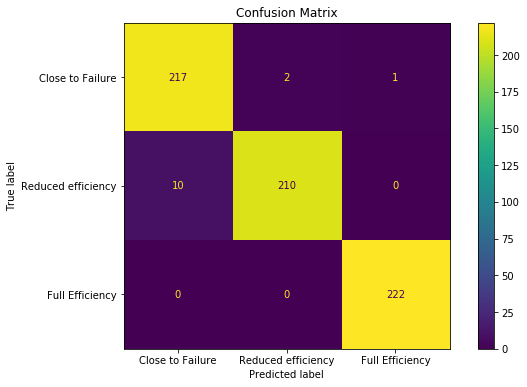

In [47]:
cmatrix(svm_model_linear)

In [48]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_testdf)))

              precision    recall  f1-score   support

           3       0.96      0.99      0.97       220
          20       0.99      0.95      0.97       220
         100       1.00      1.00      1.00       222

    accuracy                           0.98       662
   macro avg       0.98      0.98      0.98       662
weighted avg       0.98      0.98      0.98       662



In [49]:
y_score_svm = svm_model_linear.fit(X_df, y_train).decision_function(X_testdf)
y_score_svm

array([[-0.33299763,  1.33269858,  2.33262228],
       [ 0.66828385,  2.33227791, -0.33032243],
       [ 2.332385  ,  1.33101088, -0.3326586 ],
       ...,
       [ 2.33168591,  1.33126567, -0.33241392],
       [ 2.33265527,  1.32798714, -0.3327305 ],
       [-0.33299179,  1.332661  ,  2.3326406 ]])

In [50]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(y_score, X_testdf, y_test, n_classes= 3, figsize = (20,6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

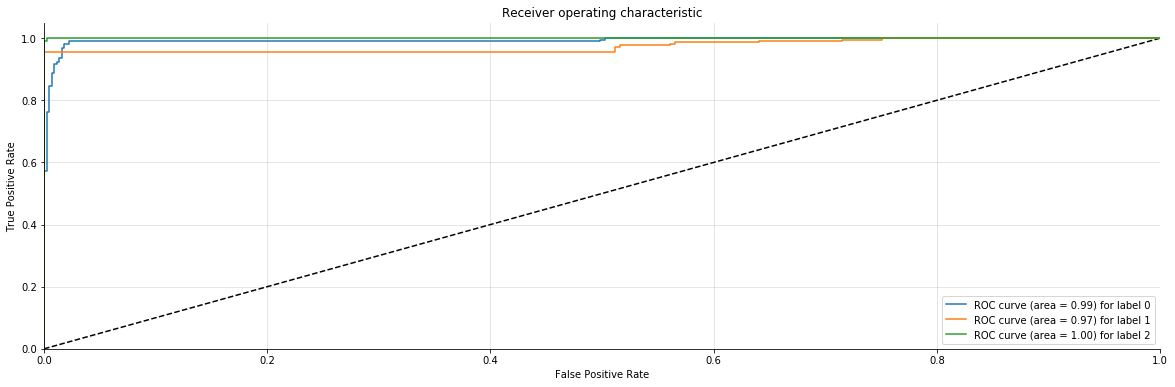

In [51]:
plot_multiclass_roc(y_score_svm,X_testdf, y_test, 3)

In [68]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_testdf)))

              precision    recall  f1-score   support

           3       0.96      0.99      0.97       220
          20       0.99      0.95      0.97       220
         100       1.00      1.00      1.00       222

    accuracy                           0.98       662
   macro avg       0.98      0.98      0.98       662
weighted avg       0.98      0.98      0.98       662



### Building an RF classifier for Cooler 

In [52]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_df, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

array([[219,   0,   1],
       [  7, 213,   0],
       [  0,   2, 220]], dtype=int64)

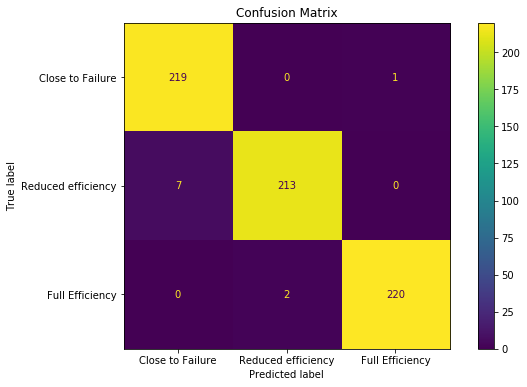

In [53]:
cmatrix(classifier_rf)

In [54]:
y_score_rf = classifier_rf.fit(X_df, y_train).predict_proba(X_testdf)
y_score_rf

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

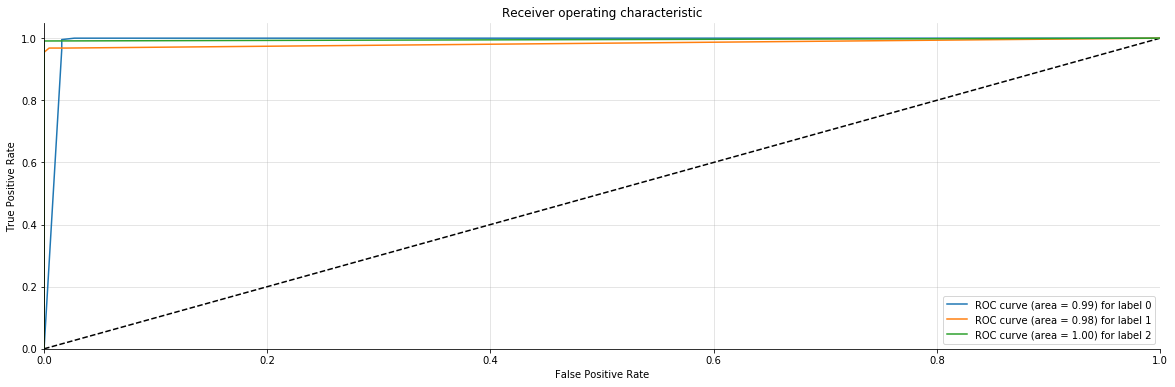

In [55]:
plot_multiclass_roc(y_score_rf, X_testdf, y_test, n_classes=3, figsize=(20, 6))

In [69]:
print(metrics.classification_report(y_test, classifier_rf.predict(X_testdf)))

              precision    recall  f1-score   support

           3       0.97      1.00      0.98       220
          20       0.99      0.97      0.98       220
         100       1.00      0.99      0.99       222

    accuracy                           0.98       662
   macro avg       0.99      0.98      0.98       662
weighted avg       0.99      0.98      0.98       662



### Hypertune parameters

In [56]:
rf_hyper = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight = 'balanced')

In [57]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

## maximum depth is 1,2,5,10,20
## minimum sample leaf is 5,10,20,50,100
## maximum no. of features is 2,3,4
## no. of trees is 10, 30,50,100,200

In [58]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator= rf_hyper, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "f1_micro")

In [59]:
%%time
grid_search.fit(X_df,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.5min finished


Wall time: 2min 31s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='f1_micro', verbose=1)

In [60]:
rf_best = grid_search.best_estimator_ ## best estimator is assigned to rf_best
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=4,
                       min_samples_leaf=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

array([[219,   0,   1],
       [  8, 212,   0],
       [  0,   2, 220]], dtype=int64)

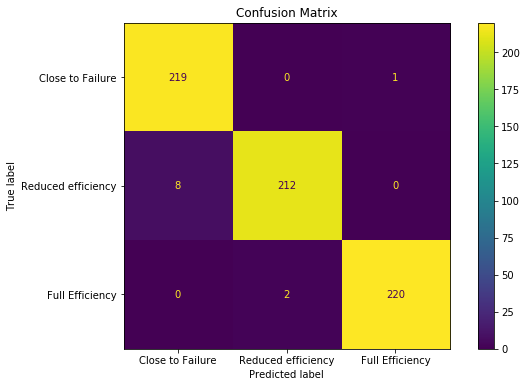

In [61]:
cmatrix(rf_best)

In [62]:
y_score_rf_hyper = rf_best.fit(X_df, y_train).predict_proba(X_testdf)
y_score_rf_hyper

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.91433839e-04, 9.99421837e-01, 8.67288750e-05],
       [9.62535389e-01, 3.74646110e-02, 0.00000000e+00],
       ...,
       [9.99946228e-01, 5.37716272e-05, 0.00000000e+00],
       [9.99978908e-01, 2.10918886e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

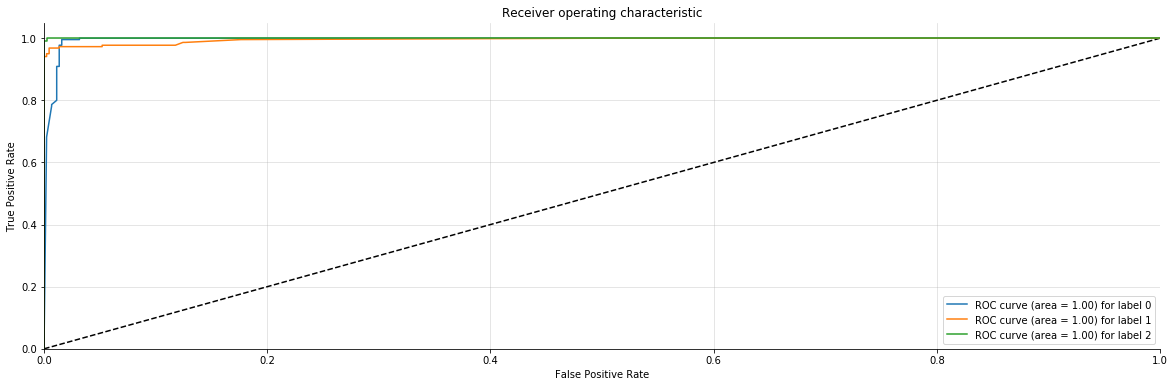

In [63]:
plot_multiclass_roc(y_score_rf_hyper, X_testdf, y_test, n_classes=3, figsize=(20, 6))

### kNN for cooler failure classification

In [64]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_df, y_train)


array([[216,   3,   1],
       [ 10, 210,   0],
       [  1,   1, 220]], dtype=int64)

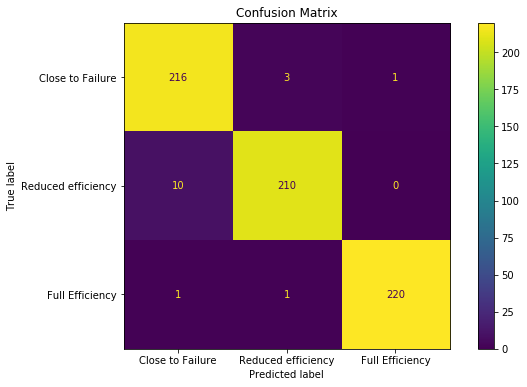

In [65]:
cmatrix(knn)

In [66]:
y_score_knn = knn.fit(X_df, y_train).predict_proba(X_testdf)
y_score_knn

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

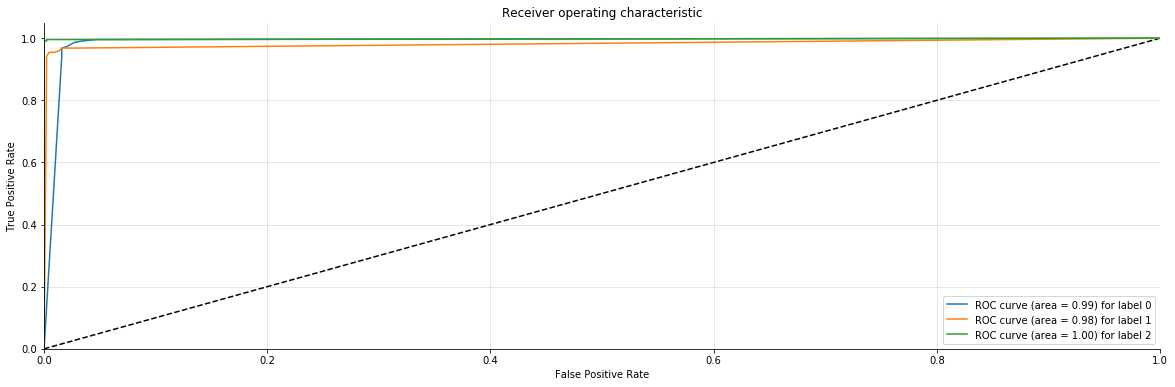

In [70]:
plot_multiclass_roc(y_score_knn, X_testdf, y_test, n_classes=3, figsize=(20, 6))

In [71]:
print(metrics.classification_report(y_test, knn.predict(X_testdf)))

              precision    recall  f1-score   support

           3       0.95      0.98      0.97       220
          20       0.98      0.95      0.97       220
         100       1.00      0.99      0.99       222

    accuracy                           0.98       662
   macro avg       0.98      0.98      0.98       662
weighted avg       0.98      0.98      0.98       662



### Building a Gradient boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# First we construct our gradient boosting model, 
# We specify 500 trees to start, each with a maximum 
# depth of three. We also specify the random_state 
# hyperparameter to ensure reproduceability.
gbtc = GradientBoostingClassifier(n_estimators=100, random_state= 42)

In [ ]:
parameters = {'max_depth':np.arange( 2,6,1 ).tolist()}

In [ ]:
clf_gbtc = GridSearchCV(gbtc, parameters,cv=6, n_jobs= -1, iid = True,  refit= True,pre_dispatch= '2*n_jobs')

In [ ]:
clf_gbtc.fit(X_train_scaled, y_train)

In [ ]:
cmatrix(clf_gbtc)

In [ ]:
y_score_gbtc = clf_gbtc.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_gbtc

In [ ]:
plot_multiclass_roc(y_score_gbtc, X_test_scaled, y_test, n_classes=3, figsize=(20, 6))

In [ ]:
import xgboost as xgb

In [ ]:
seed= 24
xgb1 = xgb.sklearn.XGBClassifier(learning_rate =0.1,n_estimators=100,max_depth=5,min_child_weight=11,
             gamma=0.1,subsample=0.8,colsample_bytree=0.7,objective='multi:softprob',n_jobs=-1,scale_pos_weight=1,
             seed=seed)
    
xgb1.fit(X_train, y_train)
    
y_pred= xgb1.predict(X_test)
    
    #confusion matrix and classification report
    
cm = confusion_matrix(y_test, y_pred)
    
print(classification_report(y_test, y_pred))